# Task 4: Conceptual Questions
Q1 :- What is entropy and information gain?

ans :- Entropy means how much impurity or randomness is there in the data. Like if all values are from same class then entropy is 0.
Information gain tells how much entropy is reduced after splitting data on a feature.
Higher info gain means better feature for split.

Q2 :- Explain the difference between Gini Index and Entropy.

ans :- Both are used to check impurity only but formula is different.
Entropy uses -p*log(p) and Gini uses 1 - sum(p^2).
Mostly Gini is faster because it doesn’t have log, but both give almost similar results.

Q3 :- How decision tree can overfit and how to avoid?

ans :- Tree overfits when it becomes too big and learns noise in training data also.
Then it works bad on test data.
To avoid we can limit tree depth, set min samples for split, or do pruning.
Also using Random Forest helps to reduce overfitting.


/tmp/ipython-input-1298154980.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-1298154980.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Accuracy: 0.776536312849162
Confusion Matrix:
 [[86 19]
 [21 53]]


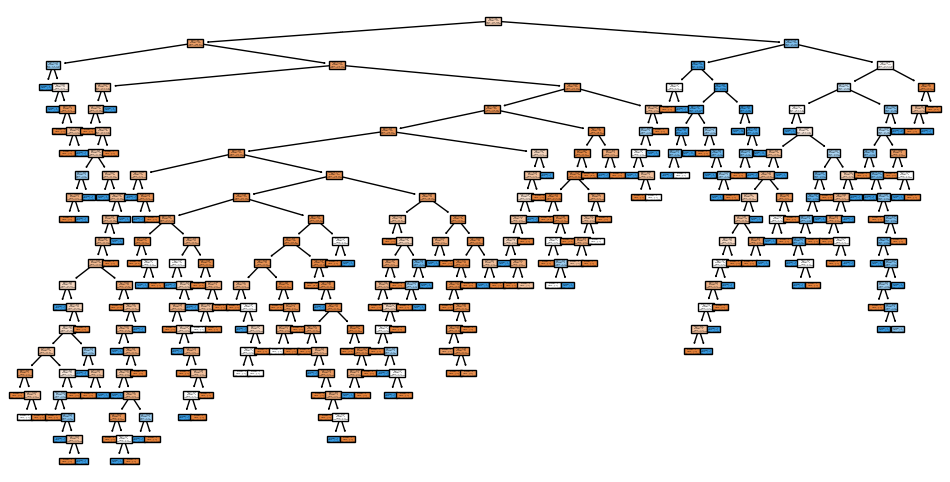

In [1]:
# Task 5: Decision Tree on Titanic Dataset
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# load Titanic dataset
df = sns.load_dataset('titanic')

# select some useful columns only
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

# handle missing values
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# encode categorical columns
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# split features and target
X = df.drop('survived', axis=1)
y = df['survived']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# accuracy and confusion matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# visualize the decision tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()



/tmp/ipython-input-232957615.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-232957615.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

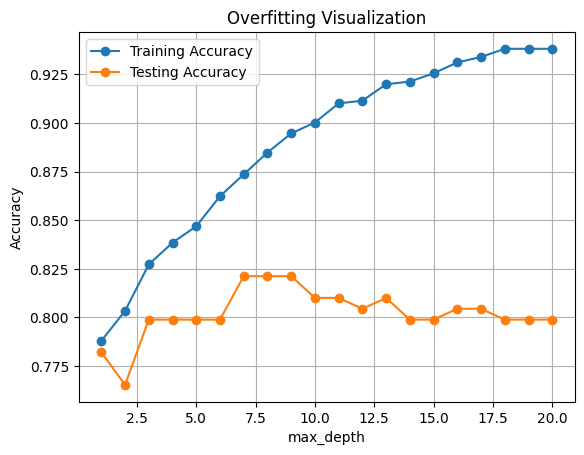

In [2]:
# Task 6: Model Tuning
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# load and preprocess Titanic dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check performance for different max_depth values
train_acc = []
test_acc = []
depth_values = range(1, 21)

for d in depth_values:
    model = DecisionTreeClassifier(max_depth=d, min_samples_split=5)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# plot training vs testing accuracy
plt.plot(depth_values, train_acc, label='Training Accuracy', marker='o')
plt.plot(depth_values, test_acc, label='Testing Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Visualization')
plt.legend()
plt.grid(True)
plt.show()
